In [10]:
import tensorflow as tf

In [11]:
mnist = tf.keras.datasets.mnist

In [12]:
#after loading the datasets  unpacking the dataset into train and test datasets
(x_train, y_train), (x_test,y_test)=mnist.load_data()


In [13]:
x_train.shape

(60000, 28, 28)

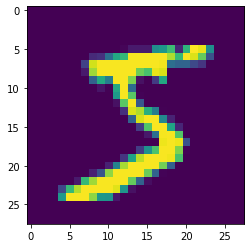

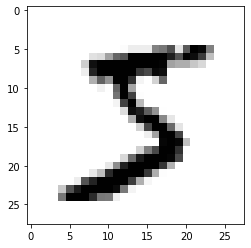

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)
#the second is the binary image and in image if the intensity is black 
#it is near to zero and if it is near to white it will be 255.

In [16]:
#before normalization 
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

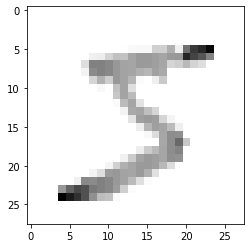

In [17]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
#so we can see that the gray image and all values varies from 0to255 in order to normalize

In [18]:
print(x_train[0]) # x_train has the data #so we can see the values are normalized all values are from 0 to 1 as it is divided by 255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:
print(y_train[0])# y_train has the label

5


In [20]:
import numpy as np
img_size=28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training sample dimension",x_trainr.shape)
print("testing sample dimension",x_testr.shape)


Training sample dimension (60000, 28, 28, 1)
testing sample dimension (10000, 28, 28, 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [22]:
model=Sequential()
# first convolution layer
model.add(Conv2D(64,(3,3), input_shape= x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model.add(Flatten())                 
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer2
model.add(Dense(32))
model.add(Activation("relu"))


#last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))


In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [24]:
print(" Total training samples=",len(x_trainr))

 Total training samples= 60000


In [25]:
import time
start_time=time.time()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)  #training the model
print()
# categorical cross entropy. It compares the predicted label and true label and calculates the loss

Epoch 1/5
1313/1313 [==============================] - 40s 28ms/step - loss: 0.6877 - accuracy: 0.7783 - val_loss: 0.1315 - val_accuracy: 0.9566
Epoch 2/5
1313/1313 [==============================] - 35s 27ms/step - loss: 0.1076 - accuracy: 0.9666 - val_loss: 0.0866 - val_accuracy: 0.9717
Epoch 3/5
1313/1313 [==============================] - 37s 29ms/step - loss: 0.0757 - accuracy: 0.9768 - val_loss: 0.0731 - val_accuracy: 0.9782
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.0818 - val_accuracy: 0.9727
Epoch 5/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.0574 - val_accuracy: 0.9812


In [26]:
#Evaluating on test data set 
test_loss, test_acc=model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 0.0614 - accuracy: 0.9826
Test loss on 10,000 test samples 0.06137567758560181
Validation Accuracy on 10,000 test samples 0.9825999736785889


In [27]:
predictions=model.predict([x_testr])

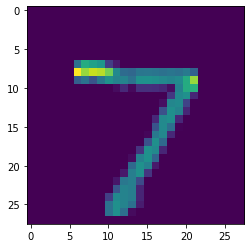

In [30]:
plt.imshow(x_test[0])

In [28]:
print(predictions)

[[1.0575857e-07 1.5063663e-06 6.4379074e-06 ... 9.9999058e-01
  1.7385251e-07 5.9452253e-07]
 [1.4976693e-04 6.7002526e-05 9.9972016e-01 ... 1.1267360e-06
  2.3228307e-05 4.0017315e-07]
 [4.1073568e-07 9.9999678e-01 1.1712398e-07 ... 5.7606746e-07
  2.8770114e-07 4.1953788e-07]
 ...
 [7.9395440e-06 6.3573589e-07 3.2148271e-06 ... 1.3131499e-06
  1.8309542e-05 5.4223518e-05]
 [2.0191213e-05 2.6288799e-06 3.4974465e-07 ... 8.8667015e-08
  2.7649512e-05 4.5004549e-06]
 [1.3142736e-05 5.9114143e-07 1.8680547e-04 ... 2.1513389e-09
  3.3622000e-06 1.9952699e-06]]


In [29]:
print(np.argmax(predictions[0]))

7


In [245]:
import cv2
path=r'C:\Users\VIDYASAGAR\OneDrive\Desktop\one.png'
img = cv2.imread(path)

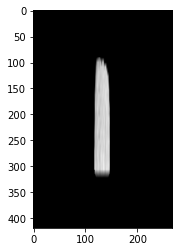

In [246]:
plt.imshow(img)

In [247]:
img.shape

(419, 268, 3)

In [248]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [249]:
gray.shape

(419, 268)

In [250]:
resized=cv2.resize(gray, (28,28),interpolation=cv2.INTER_AREA)

In [251]:
resized.shape

(28, 28)

In [252]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [253]:
newimg=np.array(newimg).reshape(-1,img_size,img_size,1)

In [254]:
newimg.shape


(1, 28, 28, 1)

In [255]:
predictions=model.predict(newimg)

In [256]:
print(np.argmax(predictions))

1


In [ ]:
import cv2
path=r'C:\Users\VIDYASAGAR\OneDrive\Desktop\zero.png'
img = cv2.imread(path)

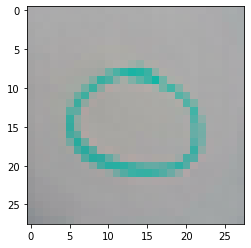

In [335]:
plt.imshow(img)

In [336]:
img.shape

(28, 28, 3)

In [337]:
newimg=tf.keras.utils.normalize(img2,axis=1)

In [338]:
newimg=np.array(img).reshape(-1,img_size,img_size,1)

In [339]:
newimg.shape


(3, 28, 28, 1)

In [340]:
predictions=model.predict(newimg)

In [341]:
print(np.argmax(predictions))

0
